In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime
import re

## Data Preparation

In [39]:
twitter_df_1 = pd.read_csv("tweet_df_v1_1.csv")
twitter_df_2 = pd.read_csv("tweet_df_v1_2.csv")

In [40]:
twitter_df_1.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [41]:
twitter_df_1.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [42]:
twitter_df_2.head()

,row,id,date,query,handle,tweet
0,816210,1551363506,Sat Apr 18 08:51:40 PDT 2009,NO_QUERY,prosario_2000,I hope you are having a great day
1,816211,1551363569,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,Chelsea_Volturi,Nope Just Bored Well Say That Most Of The Time...
2,816212,1551363682,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,askbillmitchell,Sometimes and just a little cryptic LOL I am j...
3,816213,1551363752,Sat Apr 18 08:51:41 PDT 2009,NO_QUERY,kendiixd,so i guesss im not in coolifornia anymore how ...
4,816214,1551363844,Sat Apr 18 08:51:42 PDT 2009,NO_QUERY,ladycalypso,I do that too but right now its the Radiant Da...


In [43]:
twitter_df_2.tail()

,row,id,date,query,handle,tweet
783785,1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up Having no school is the best feel...
783786,1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDBcom Very cool to hear old Walt interview...
783787,1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover Ask me fo...
783788,1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time Tup...
783789,1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy charitytuesday


In [44]:
twitter_df = pd.concat([twitter_df_1, twitter_df_1])

In [45]:
twitter_df.head()

,row,id,date,query,handle,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [46]:
twitter_df.tail()

,row,id,date,query,handle,tweet
816205,816205,1551363324,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,heybreyannaheyy,radiodisney HEEECK YEAH
816206,816206,1551363325,Sat Apr 18 08:51:36 PDT 2009,NO_QUERY,mylifeonaplate,I had a blast at my Bachelorette Party Watch o...
816207,816207,1551363360,Sat Apr 18 08:51:39 PDT 2009,NO_QUERY,biazinhahitz,Hey Sam How old was Dougie when he started pla...
816208,816208,1551363436,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,damana,hello again
816209,816209,1551363454,Sat Apr 18 08:51:38 PDT 2009,NO_QUERY,lilpea,im excited to see you tonight what time are yo...


In [47]:
print(twitter_df.shape)

(1632420, 6)


In [48]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1632420 entries, 0 to 816209
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   row     1632420 non-null  int64 
 1   id      1632420 non-null  int64 
 2   date    1632420 non-null  object
 3   query   1632420 non-null  object
 4   handle  1632420 non-null  object
 5   tweet   1629024 non-null  object
dtypes: int64(2), object(4)
memory usage: 87.2+ MB


In [49]:
twitter_df = twitter_df.reset_index()
twitter_df.head()

,index,row,id,date,query,handle,tweet
0,0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [50]:
twitter_df = twitter_df[['date','tweet']]
twitter_df.head()

,date,tweet
0,Mon Apr 06 22:19:45 PDT 2009,Awww thats a bummer You shoulda got David Carr...
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he cant update his Facebook by t...
2,Mon Apr 06 22:19:53 PDT 2009,I dived many times for the ball Managed to sav...
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,no its not behaving at all im mad why am i her...


In [51]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [52]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1629024 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [53]:
# functions to apply to tweets
def polarity_score(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return - 1

def polarity_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"
    
def subjectivity_word(x):
    if (x < 0.6 and x >0.4):
        return "subjective"
    else:
        return "objective"
    
def vader_score(x):
    if x > 0.05:
        return 1
    elif x < -0.05:
        return -1
    else:
        return 0

def vader_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"

In [54]:
twitter_df.tweet[0]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [55]:
twitter_df.loc[0][1]

'Awww thats a bummer You shoulda got David Carr of Third Day to do it D'

In [56]:
from textblob import TextBlob

In [57]:
#pip install textblob

In [68]:
import nltk

In [59]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
twitter_df.head()

,date,tweet
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...


In [72]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632420 entries, 0 to 1632419
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1632420 non-null  datetime64[ns]
 1   tweet   1629024 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 24.9+ MB


In [74]:
twitter_df["tweet"] = twitter_df["tweet"].astype(str)

In [76]:
lemmatizer = WordNetLemmatizer()

In [77]:
twitter_df['lemmatizer'] = twitter_df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [78]:
twitter_df

,date,tweet,lemmatizer
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...
...,...,...,...
1632415,2009-04-18 08:51:38,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH
1632416,2009-04-18 08:51:36,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...
1632417,2009-04-18 08:51:39,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...
1632418,2009-04-18 08:51:38,hello again,hello again


### Sentiment Analysis

In [91]:
def calculate_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [92]:
twitter_df["polarity_scores"] = twitter_df["tweet"].apply(calculate_polarity)

In [79]:
twitter_df['polarity_scores'] = twitter_df['lemmatizer'].map(lambda text: TextBlob(text).sentiment.polarity)

In [93]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative
...,...,...,...,...,...,...
1632415,2009-04-18 08:51:38,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH,0.000,0,neutral
1632416,2009-04-18 08:51:36,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...,0.000,0,neutral
1632417,2009-04-18 08:51:39,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...,-0.025,-1,negative
1632418,2009-04-18 08:51:38,hello again,hello again,0.000,0,neutral


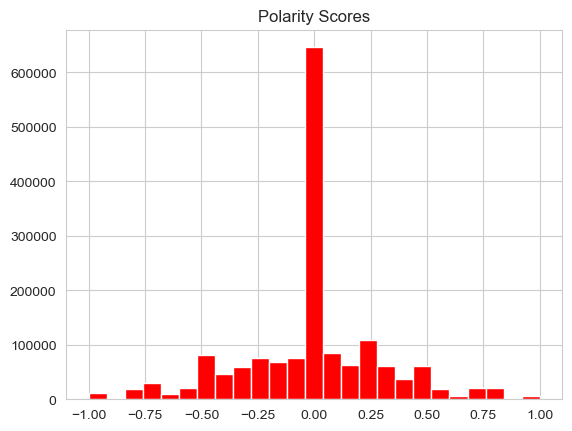

In [94]:
plt.hist(twitter_df['polarity_scores'], bins = 25, color = "red")
plt.title('Polarity Scores')
plt.show()

In [95]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)

In [96]:
twitter_df.head()

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative


In [97]:
import seaborn as sns

<Axes: xlabel='polarity_word', ylabel='count'>

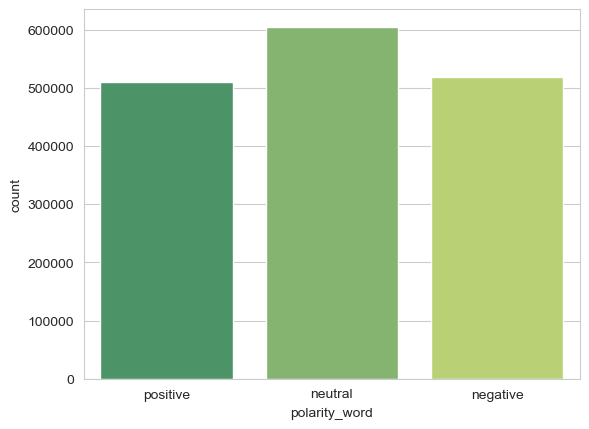

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='polarity_word',data=twitter_df, palette='summer')

In [99]:
def calculate_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

In [100]:
twitter_df["subjectivity_scores"] = twitter_df["tweet"].apply(calculate_subjectivity)

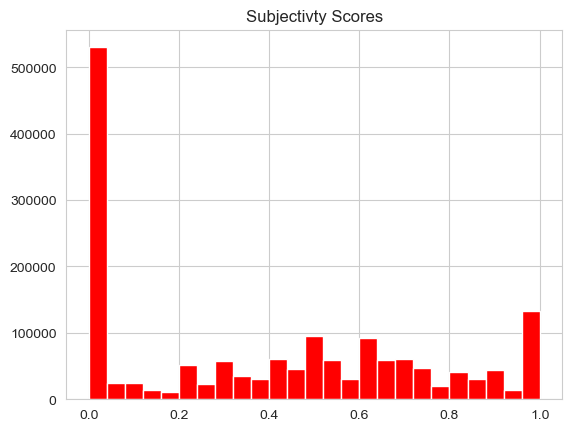

In [101]:
plt.hist(twitter_df['subjectivity_scores'], bins = 25, color = "red")
plt.title('Subjectivty Scores')
plt.show()

In [36]:
#pip install vaderSentiment

In [102]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [103]:
analyzer = SentimentIntensityAnalyzer()
vader_scores = twitter_df['lemmatizer'].apply(analyzer.polarity_scores)
vader = []
for i in vader_scores:
    vader.append(i['compound'])
twitter_df['vader_scores'] = vader

In [104]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores
0,2009-04-06 22:19:45,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive,0.45,-0.3818
1,2009-04-06 22:19:49,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral,0.00,-0.7269
2,2009-04-06 22:19:53,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive,0.50,0.4939
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive,0.40,-0.2500
4,2009-04-06 22:19:57,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative,1.00,-0.6597
...,...,...,...,...,...,...,...,...
1632415,2009-04-18 08:51:38,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH,0.000,0,neutral,0.00,0.4466
1632416,2009-04-18 08:51:36,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...,0.000,0,neutral,0.00,0.4019
1632417,2009-04-18 08:51:39,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...,-0.025,-1,negative,0.35,0.2023
1632418,2009-04-18 08:51:38,hello again,hello again,0.000,0,neutral,0.00,0.0000


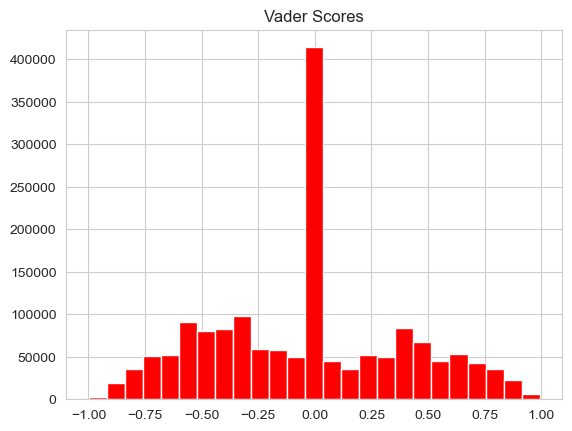

In [105]:
plt.hist(twitter_df['vader_scores'], bins = 25, color = "red")
plt.title('Vader Scores')
plt.show()

In [106]:
from datetime import datetime,date

In [107]:
d = datetime.now()

In [108]:
twitter_df['date'] = [d.date() for d in twitter_df["date"]]
twitter_df

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive,0.45,-0.3818
1,2009-04-06,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral,0.00,-0.7269
2,2009-04-06,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive,0.50,0.4939
3,2009-04-06,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive,0.40,-0.2500
4,2009-04-06,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative,1.00,-0.6597
...,...,...,...,...,...,...,...,...
1632415,2009-04-18,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH,0.000,0,neutral,0.00,0.4466
1632416,2009-04-18,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...,0.000,0,neutral,0.00,0.4019
1632417,2009-04-18,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...,-0.025,-1,negative,0.35,0.2023
1632418,2009-04-18,hello again,hello again,0.000,0,neutral,0.00,0.0000


In [109]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'], format='%m-%d-%Y')

In [110]:
# aggregating the scores for each date in the dataset by computing the average
polarity_df = twitter_df.groupby('date')['polarity_scores'].mean().reset_index()
subjectivity_df = twitter_df.groupby('date')['subjectivity_scores'].mean().reset_index()
vader_df = twitter_df.groupby('date')['vader_scores'].mean().reset_index()

In [111]:
data = {
    'date': polarity_df['date'],
    'polarity_scores': polarity_df['polarity_scores'],
    'subjectivity_scores': subjectivity_df['subjectivity_scores'],
    'vader_scores': vader_df['vader_scores']
}

ts_df = pd.DataFrame(data)
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.095442,0.406949,0.147343
1,2009-04-07,0.098875,0.398863,0.162493
2,2009-04-17,0.121628,0.408108,0.198122
3,2009-04-18,0.033549,0.394722,0.046762
4,2009-04-19,-0.006991,0.376510,-0.020330
5,2009-04-20,-0.012211,0.382240,-0.036186
6,2009-04-21,-0.003825,0.391716,-0.029846
7,2009-05-01,-0.012512,0.401361,-0.045176
8,2009-05-02,-0.007484,0.389781,-0.028857
9,2009-05-03,-0.012117,0.391659,-0.035131


In [112]:
ts_df.set_index('date', inplace=True)

In [113]:
ts_df

,polarity_scores,subjectivity_scores,vader_scores
date,,,
2009-04-06,0.095442,0.406949,0.147343
2009-04-07,0.098875,0.398863,0.162493
2009-04-17,0.121628,0.408108,0.198122
2009-04-18,0.033549,0.394722,0.046762
2009-04-19,-0.006991,0.376510,-0.020330
2009-04-20,-0.012211,0.382240,-0.036186
2009-04-21,-0.003825,0.391716,-0.029846
2009-05-01,-0.012512,0.401361,-0.045176
2009-05-02,-0.007484,0.389781,-0.028857


In [114]:
ts_df = ts_df.resample('D').ffill().reset_index()

In [115]:
ts_df

,date,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,0.095442,0.406949,0.147343
1,2009-04-07,0.098875,0.398863,0.162493
2,2009-04-08,0.098875,0.398863,0.162493
3,2009-04-09,0.098875,0.398863,0.162493
4,2009-04-10,0.098875,0.398863,0.162493
...,...,...,...,...
76,2009-06-21,-0.001317,0.397892,-0.022298
77,2009-06-22,-0.027215,0.406086,-0.061300
78,2009-06-23,-0.021168,0.403651,-0.048686
79,2009-06-24,-0.018205,0.397724,-0.043578


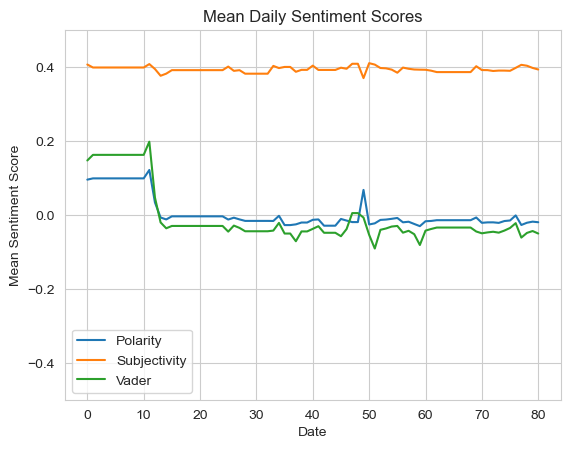

In [116]:
plt.plot(ts_df['polarity_scores'],label='Polarity')
plt.plot(ts_df['subjectivity_scores'],label="Subjectivity")
plt.plot(ts_df['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### Forecasting

In [53]:
#pip install skforecast

In [117]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [118]:
data_train = ts_df[0:int(len(ts_df)*.8)]

Train dates : 2009-04-06 00:00:00 --- 2009-06-08 00:00:00  (n=64)
Test dates  : 2009-06-09 00:00:00 --- 2009-06-25 00:00:00  (n=17)


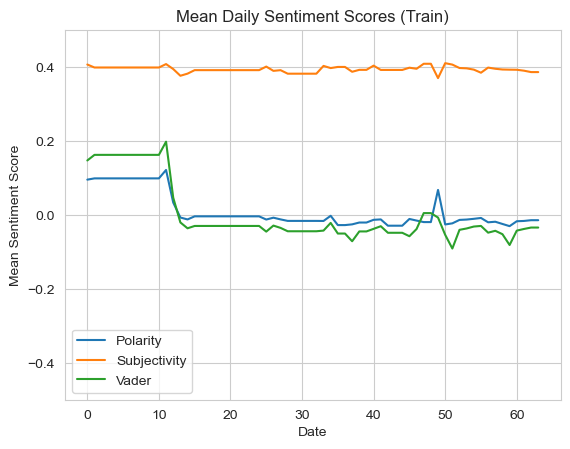

In [119]:
# Split data into train-test

data_train = ts_df[0:int(len(ts_df)*.8)]
data_test  = ts_df[int(len(ts_df)*.8):]

print(f"Train dates : {data_train['date'][0]} --- {data_train['date'][len(data_train) - 1]}  (n={len(data_train)})")
print(f"Test dates  : {data_test['date'][int(len(ts_df)*.8)]} --- {data_test['date'][len(ts_df) - 1]}  (n={len(data_test)})")

plt.plot(data_train['polarity_scores'],label='Polarity')
plt.plot(data_train['subjectivity_scores'],label="Subjectivity")
plt.plot(data_train['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Train)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

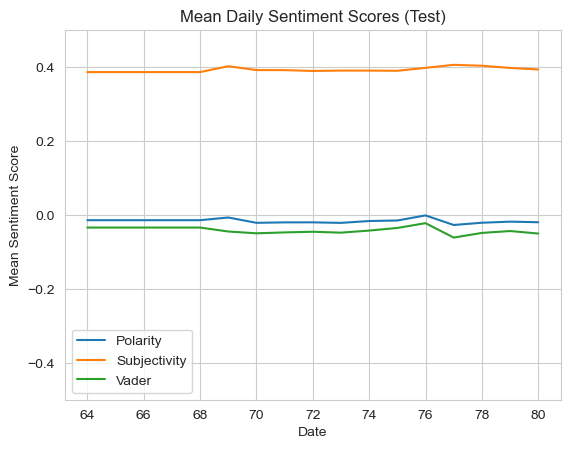

In [120]:
plt.plot(data_test['polarity_scores'],label='Polarity')
plt.plot(data_test['subjectivity_scores'],label="Subjectivity")
plt.plot(data_test['vader_scores'],label='Vader')
plt.title("Mean Daily Sentiment Scores (Test)")
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
plt.show()

### ForecasterAutoreg Polarity

In [121]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=data_train['polarity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-06 23:08:50 
Last fit date: 2023-11-06 23:08:50 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [122]:
# Predictions
# ==============================================================================
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64   -0.009027
65   -0.015491
66   -0.001696
67   -0.019082
68   -0.017289
Name: pred, dtype: float64

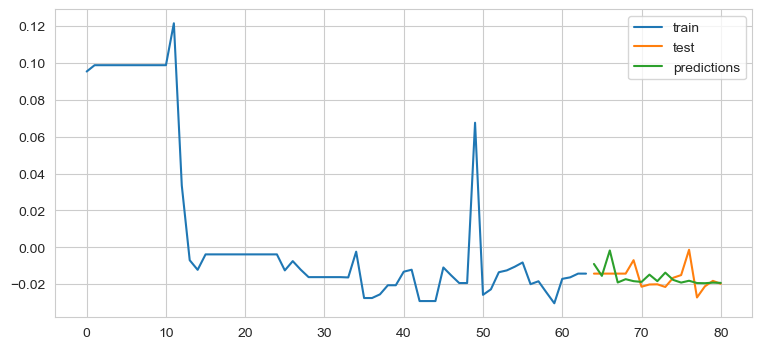

In [123]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [124]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 4.789630804486697e-05


In [125]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['polarity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.0003135558630376784



In [126]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000314,3,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000314,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000314,5,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000319,3,500
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",0.000323,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.000323,5,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000325,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000326,3,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000328,5,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000329,5,100


In [127]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['polarity_scores'])

In [128]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

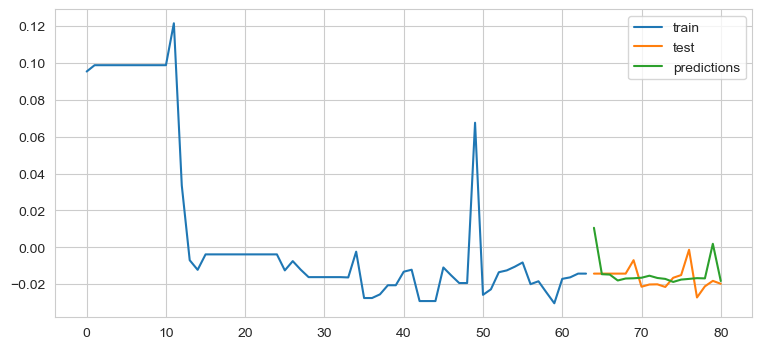

In [129]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['polarity_scores'].plot(ax=ax, label='train')
data_test['polarity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [130]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['polarity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 9.477571419003594e-05


### ForecasterAutoreg Subjectivity

In [131]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags = 7
                )

forecaster.fit(y=data_train['subjectivity_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=12356) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12356, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-06 23:09:45 
Last fit date: 2023-11-06 23:09:45 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [132]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64    0.387206
65    0.388146
66    0.388264
67    0.389095
68    0.390294
Name: pred, dtype: float64

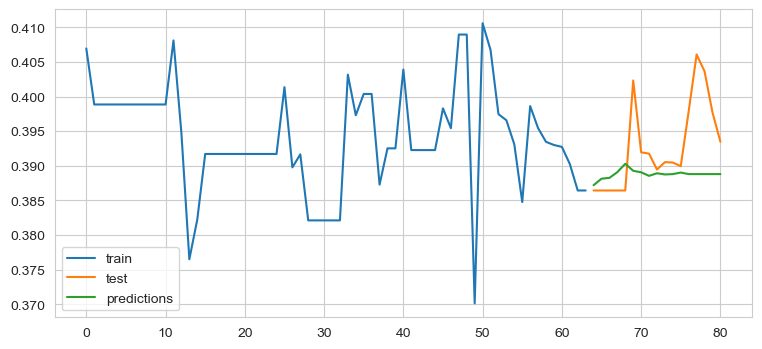

In [133]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [134]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 5.453726428111105e-05


In [135]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=12356),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['subjectivity_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.00011452366719217576



In [136]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000115,3,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000117,5,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000117,3,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000117,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000121,10,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000123,10,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000165,3,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000165,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000166,5,100
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.000166,5,500


### Final model

In [137]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=12356)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['subjectivity_scores'])

In [138]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

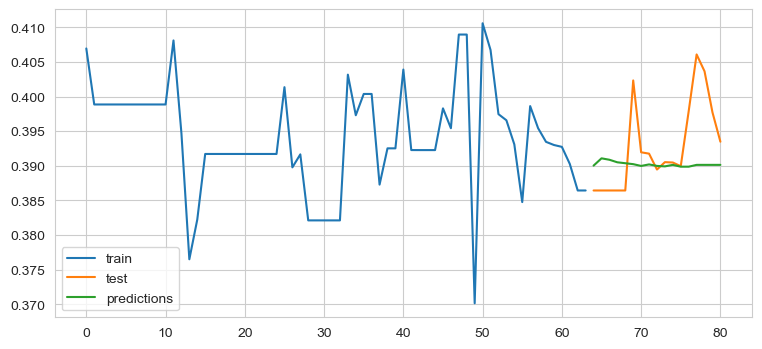

In [139]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['subjectivity_scores'].plot(ax=ax, label='train')
data_test['subjectivity_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [140]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['subjectivity_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 4.758410406971825e-05


### ForecasterAutoreg Vader

In [141]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags = 7
                )

forecaster.fit(y=data_train['vader_scores'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=4567) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 63] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4567, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-06 23:10:57 
Last fit date: 2023-11-06 23:10:57 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [142]:
steps = 17
predictions = forecaster.predict(steps=steps)
predictions.head(5)

64   -0.044162
65   -0.046658
66   -0.047359
67   -0.045447
68   -0.039635
Name: pred, dtype: float64

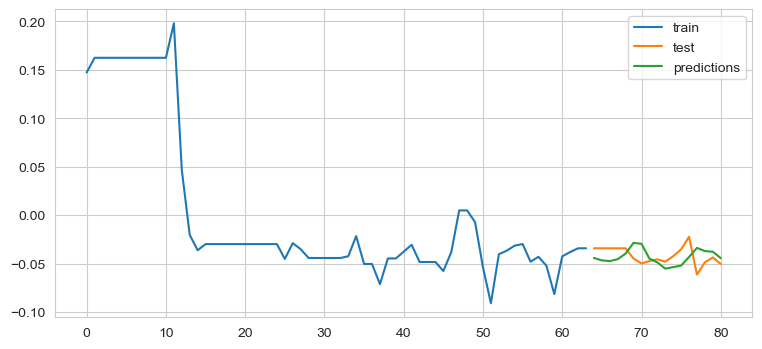

In [143]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [144]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00018430864616540493


In [145]:
# Hyperparameter Grid search
# ==============================================================================
steps = 17
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=4567),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['vader_scores'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 0.000336144085260267



In [146]:
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.000336,3,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.000338,5,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",0.000342,10,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.000343,3,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.000378,10,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.000379,5,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.000429,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.000446,3,500
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",0.000450,10,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",0.000453,5,100


In [147]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=4567)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 10
             )

forecaster.fit(y=data_train['vader_scores'])

In [148]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

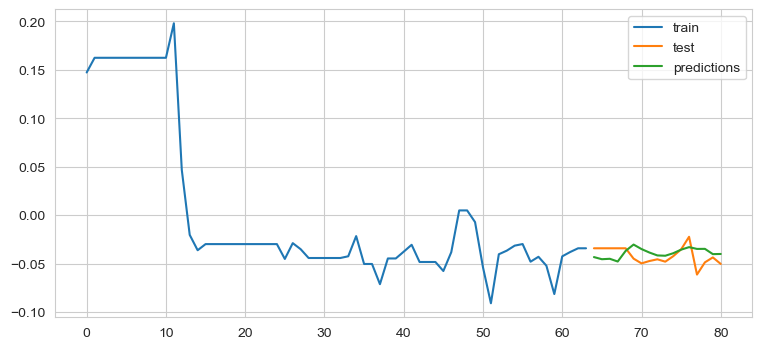

In [149]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['vader_scores'].plot(ax=ax, label='train')
data_test['vader_scores'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [150]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['vader_scores'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00013046901326687382


### Deep Learning

In [151]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive,0.45,-0.3818
1,2009-04-06,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral,0.00,-0.7269
2,2009-04-06,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive,0.50,0.4939
3,2009-04-06,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive,0.40,-0.2500
4,2009-04-06,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative,1.00,-0.6597
...,...,...,...,...,...,...,...,...
1632415,2009-04-18,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH,0.000,0,neutral,0.00,0.4466
1632416,2009-04-18,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...,0.000,0,neutral,0.00,0.4019
1632417,2009-04-18,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...,-0.025,-1,negative,0.35,0.2023
1632418,2009-04-18,hello again,hello again,0.000,0,neutral,0.00,0.0000


In [152]:
twitter_df['polarity_scores_int'] = twitter_df['polarity_scores'].apply(func = polarity_score)
twitter_df['polarity_word'] = twitter_df['polarity_scores_int'].apply(func = polarity_word)
#ts_df['subjectivity_scores_int'] = ts_df['subjectivity_scores'].apply(func = subjectivity_score)
twitter_df['subjectivity_word'] = twitter_df['subjectivity_scores'].apply(func = subjectivity_word)
twitter_df['vader_scores_int'] = twitter_df['vader_scores'].apply(func = vader_score)
twitter_df['vader_word'] = twitter_df['vader_scores_int'].apply(func = vader_word)

In [153]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores,subjectivity_word,vader_scores_int,vader_word
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive,0.45,-0.3818,subjective,-1,negative
1,2009-04-06,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral,0.00,-0.7269,objective,-1,negative
2,2009-04-06,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive,0.50,0.4939,subjective,1,positive
3,2009-04-06,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive,0.40,-0.2500,objective,-1,negative
4,2009-04-06,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative,1.00,-0.6597,objective,-1,negative
...,...,...,...,...,...,...,...,...,...,...,...
1632415,2009-04-18,radiodisney HEEECK YEAH,radiodisney HEEECK YEAH,0.000,0,neutral,0.00,0.4466,objective,1,positive
1632416,2009-04-18,I had a blast at my Bachelorette Party Watch o...,I had a blast at my Bachelorette Party Watch o...,0.000,0,neutral,0.00,0.4019,objective,1,positive
1632417,2009-04-18,Hey Sam How old was Dougie when he started pla...,Hey Sam How old wa Dougie when he started play...,-0.025,-1,negative,0.35,0.2023,objective,1,positive
1632418,2009-04-18,hello again,hello again,0.000,0,neutral,0.00,0.0000,objective,0,neutral


<Axes: xlabel='subjectivity_word', ylabel='count'>

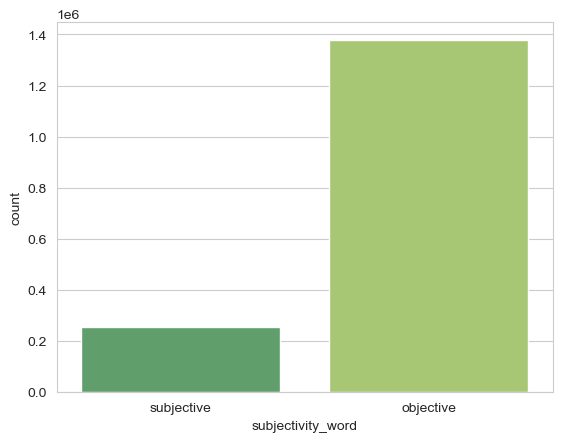

In [154]:
sns.set_style('whitegrid')
sns.countplot(x='subjectivity_word',data=twitter_df, palette='summer')

In [155]:
import string 
from string import punctuation 
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
def get_text_processing(text):
    stpword = stopwords.words('english') 
    no_punctuation = [char for char in text if char not in string.punctuation] 
    no_punctuation = ''.join(no_punctuation) 
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword]) 

In [157]:
twitter_df['test'] = twitter_df['lemmatizer'].apply(get_text_processing)

twitter_df.head()

,date,tweet,lemmatizer,polarity_scores,polarity_scores_int,polarity_word,subjectivity_scores,vader_scores,subjectivity_word,vader_scores_int,vader_word,test
0,2009-04-06,Awww thats a bummer You shoulda got David Carr...,Awww thats a bummer You shoulda got David Carr...,0.200,1,positive,0.45,-0.3818,subjective,-1,negative,Awww thats bummer shoulda got David Carr Third...
1,2009-04-06,is upset that he cant update his Facebook by t...,is upset that he cant update his Facebook by t...,0.000,0,neutral,0.00,-0.7269,objective,-1,negative,upset cant update Facebook texting might cry r...
2,2009-04-06,I dived many times for the ball Managed to sav...,I dived many time for the ball Managed to save...,0.500,1,positive,0.50,0.4939,subjective,1,positive,dived many time ball Managed save 50 rest go b...
3,2009-04-06,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,0.200,1,positive,0.40,-0.2500,objective,-1,negative,whole body feel itchy like fire
4,2009-04-06,no its not behaving at all im mad why am i her...,no it not behaving at all im mad why am i here...,-0.625,-1,negative,1.00,-0.6597,objective,-1,negative,behaving im mad cant see


In [158]:
polarity_dummies = pd.get_dummies(twitter_df["polarity_word"])

polarity_df = pd.concat([twitter_df[['date', 'test']], polarity_dummies], axis=1)

polarity_df.head()

,date,test,negative,neutral,positive
0,2009-04-06,Awww thats bummer shoulda got David Carr Third...,False,False,True
1,2009-04-06,upset cant update Facebook texting might cry r...,False,True,False
2,2009-04-06,dived many time ball Managed save 50 rest go b...,False,False,True
3,2009-04-06,whole body feel itchy like fire,False,False,True
4,2009-04-06,behaving im mad cant see,True,False,False


In [159]:
def dummy_code(x):
    if x == False:
        return 0
    else:
        return 1

In [160]:
polarity_df['negative'] = polarity_df['negative'].apply(func = dummy_code)
polarity_df['neutral'] = polarity_df['neutral'].apply(func = dummy_code)
polarity_df['positive'] = polarity_df['positive'].apply(func = dummy_code)

In [161]:
polarity_df

,date,test,negative,neutral,positive
0,2009-04-06,Awww thats bummer shoulda got David Carr Third...,0,0,1
1,2009-04-06,upset cant update Facebook texting might cry r...,0,1,0
2,2009-04-06,dived many time ball Managed save 50 rest go b...,0,0,1
3,2009-04-06,whole body feel itchy like fire,0,0,1
4,2009-04-06,behaving im mad cant see,1,0,0
...,...,...,...,...,...
1632415,2009-04-18,radiodisney HEEECK YEAH,0,1,0
1632416,2009-04-18,blast Bachelorette Party Watch photo video FB ...,0,1,0
1632417,2009-04-18,Hey Sam old wa Dougie started playing bass xx,1,0,0
1632418,2009-04-18,hello,0,1,0


In [181]:
polarity_df.to_csv('polairty_df.csv')

In [162]:
from sklearn.model_selection import train_test_split

In [241]:
polarity_df_clean = pd.read_csv("tfidf_data (1).csv")

In [242]:
polarity_df_clean.head()

,date,test,features,negative,positive,neutral
0,0,Awww thats bummer shoulda got David Carr Third...,"(100000,[11496],[11.597524545822827])",0,1,0
1,1,upset cant update Facebook texting might cry r...,"(100000,[91446],[11.361135767758597])",0,0,1
2,2,dived many time ball Managed save 50 rest go b...,"(100000,[28004],[11.472361402868822])",0,1,0
3,3,whole body feel itchy like fire,"(100000,[89663],[11.740625389463501])",0,1,0
4,4,behaving im mad cant see,"(100000,[41304],[11.472361402868822])",1,0,0


In [243]:
polarity_df_clean.shape

(1632420, 6)

In [248]:
empty = []

In [251]:
sparse_vector_str

'(100000,[75080],[11.472361402868822])'

In [249]:
for i in range(len(polarity_df_clean.test)):
    sparse_vector_str = polarity_df_clean.features[i]
    
    # Extract the indices and values from the string
    start_index = sparse_vector_str.index('[')
    end_index = sparse_vector_str.index(']')
    indices_str = sparse_vector_str[start_index + 1:end_index]
    values_str = sparse_vector_str[end_index + 3:len(sparse_vector_str) - 2]

    # Convert the indices to a list of integers
    indices = list(map(int, indices_str.split(',')))

    # Clean up the values string and convert to a list of floats
    values_str = values_str.strip('[ ]')
    values = [float(value) for value in values_str.split(',')]

    # Determine the length of the numeric array based on the last index
    array_length = max(indices) + 1

    # Create a dense numeric array
    numeric_array = np.zeros(array_length)

    for index, value in zip(indices, values):
        numeric_array[index] = value
    
    empty[i] = empty.append(numeric_array)

In [244]:
def sparse_vector_clean(x):
    # Example sparse vector as a string
    sparse_vector_str = x

    # Extract the indices and values from the string
    start_index = sparse_vector_str.index('[')
    end_index = sparse_vector_str.index(']')
    indices_str = sparse_vector_str[start_index + 1:end_index]
    values_str = sparse_vector_str[end_index + 3:len(sparse_vector_str) - 2]

    # Convert the indices to a list of integers
    indices = list(map(int, indices_str.split(',')))

    # Clean up the values string and convert to a list of floats
    values_str = values_str.strip('[ ]')
    values = [float(value) for value in values_str.split(',')]

    # Determine the length of the numeric array based on the last index
    array_length = max(indices) + 1

    # Create a dense numeric array
    numeric_array = np.zeros(array_length)

    for index, value in zip(indices, values):
        numeric_array[index] = value

    # Now, 'numeric_array' contains the numeric values as an array
    return(numeric_array)

In [247]:
polarity_df_clean['num_array'] = polarity_df_clean["features"].apply(func = sparse_vector_clean)

MemoryError: Unable to allocate 765. KiB for an array with shape (97873,) and data type float64

In [246]:
polarity_df_clean.head()

,date,test,features,negative,positive,neutral,num_array
0,0,Awww thats bummer shoulda got David Carr Third...,"(100000,[11496],[11.597524545822827])",0,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,upset cant update Facebook texting might cry r...,"(100000,[91446],[11.361135767758597])",0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,dived many time ball Managed save 50 rest go b...,"(100000,[28004],[11.472361402868822])",0,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,whole body feel itchy like fire,"(100000,[89663],[11.740625389463501])",0,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,behaving im mad cant see,"(100000,[41304],[11.472361402868822])",1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [201]:
y = polarity_df_clean.drop(['date', 'test', 'features'], axis=1).values
y_train = y[0:int(len(y)*.8)]
y_test = y[int(len(y)*.8):]

In [175]:
X = polarity_df["test"].values 
y = polarity_df.drop(["date","test"], axis=1).values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [176]:
X

array(['Awww thats bummer shoulda got David Carr Third Day',
       'upset cant update Facebook texting might cry result School today also Blah',
       'dived many time ball Managed save 50 rest go bound', ...,
       'Hey Sam old wa Dougie started playing bass xx', 'hello',
       'im excited see tonight time planning going'], dtype=object)

In [165]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [170]:
from scipy.sparse import vstack

In [177]:
vect = CountVectorizer(min_df=5, max_df=0.9) 
X_train = vect.fit_transform(X_train) 
X_test = vect.transform(X_test)

In [178]:
X_train

<1142694x45054 sparse matrix of type '<class 'numpy.int64'>'
	with 7947926 stored elements in Compressed Sparse Row format>

In [179]:
X_test

<489726x45054 sparse matrix of type '<class 'numpy.int64'>'
	with 3393982 stored elements in Compressed Sparse Row format>

In [180]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train) 
X_test = tfidf.transform(X_test)
X_train = X_train.toarray() 
X_test = X_test.toarray()

MemoryError: Unable to allocate 384. GiB for an array with shape (1142694, 45054) and data type float64

In [121]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
#pip install tensorflow

In [194]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping 

In [125]:
model = Sequential() 
model.add(Dense(units=2649, activation="relu")) 
model.add(Dropout(0.5)) 
model.add(Dense(units=3, activation="softmax")) 
opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2) 

In [126]:
model.fit( 
 x=X_train, 
 y=y_train, 
 batch_size=10, 
 epochs=10, 
 validation_data=(X_test, y_test), 
 verbose=1, 
 callbacks=early_stop, 
) 

Epoch 1/10
1625/1625 [==============================] - 177s 109ms/step - loss: 0.5089 - accuracy: 0.8097 - val_loss: 0.3347 - val_accuracy: 0.8933
Epoch 2/10
1625/1625 [==============================] - 179s 110ms/step - loss: 0.2062 - accuracy: 0.9365 - val_loss: 0.2815 - val_accuracy: 0.9108
Epoch 3/10
1625/1625 [==============================] - 182s 112ms/step - loss: 0.1059 - accuracy: 0.9700 - val_loss: 0.2271 - val_accuracy: 0.9332
Epoch 4/10
1625/1625 [==============================] - 189s 116ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.2197 - val_accuracy: 0.9411
Epoch 5/10
1625/1625 [==============================] - 171s 105ms/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.2256 - val_accuracy: 0.9433
Epoch 6/10
1625/1625 [==============================] - 185s 114ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.2399 - val_accuracy: 0.9459
Epoch 6: early stopping


In [127]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1) 
print("Test accuracy:", model_score[1]) 

109/109 [==============================] - 2s 16ms/step - loss: 0.2399 - accuracy: 0.9459
Test accuracy: 0.9458566904067993
